# DATA PRE-PROCESSING

*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-s-rao04/
* e-mail - sanjay.s.rao04@gmail.com

Data preprocessing is a technique which is used to transform the raw data in a useful and efficient format. The quality of the data should be checked before applying machine learning or data mining algorithms.



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4.0,4.0,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4.0,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
# Seperating dependent and independent variables
# dependent variable
Y = data[['price']]
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [5]:
# independent variable
X = data.iloc[:,1:]
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,8960.0,4.0,4.0,4,yes,no,no,no,yes,3,no,furnished
2,9960.0,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500.0,4.0,2.0,2,yes,no,yes,no,yes,3,yes,furnished
4,7420.0,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


## Handling Missing data

In [6]:
X.isnull().sum()

area                 9
bedrooms            10
bathrooms            8
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
dtype: int64

In [7]:
# Filling null values with the mean values
X = X.fillna(X.mean())

In [8]:
X.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Exploratory Data Analysis

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


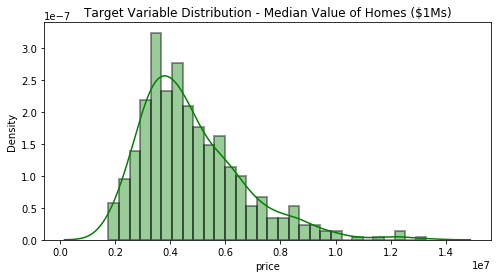

In [9]:
plt.figure(figsize=[8,4])
sns.distplot(data['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [10]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = data.shape

data.drop_duplicates(inplace=True)

if data.shape==(rs,cs):
    print('Inference: The dataset doesn\'t have any duplicates')
else:
    print(f'Inference: Number of duplicates dropped/fixed ---> {rs-data.shape[0]}')

Inference: The dataset doesn't have any duplicates


## Dealing the Categorical variables

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelEn = LabelEncoder()

In [13]:
X['mainroad'] = labelEn.fit_transform(X['mainroad'])
X['prefarea'] = labelEn.fit_transform(X['prefarea'])
X['guestroom'] = labelEn.fit_transform(X['guestroom'])
X['basement'] = labelEn.fit_transform(X['basement'])
X['hotwaterheating'] = labelEn.fit_transform(X['hotwaterheating'])
X['airconditioning'] = labelEn.fit_transform(X['airconditioning'])
X['furnishingstatus'] = labelEn.fit_transform(X['furnishingstatus'])

In [14]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4.0,2.0,3,1,0,0,0,1,2,1,0
1,8960.0,4.0,4.0,4,1,0,0,0,1,3,0,0
2,9960.0,3.0,2.0,2,1,0,1,0,0,2,1,1
3,7500.0,4.0,2.0,2,1,0,1,0,1,3,1,0
4,7420.0,4.0,1.0,2,1,1,1,0,1,2,0,0


## Splitting of data into training data and testing data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [17]:
x_train.shape

(436, 12)

In [18]:
x_test.shape

(109, 12)

## Standardization of the Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc_x = StandardScaler()

In [21]:
sc_x.fit_transform(x_train)

array([[-0.72072999, -1.30472511, -0.57393   , ..., -0.81914879,
        -0.57028761,  1.18364739],
       [-0.54195412,  0.00486859, -0.57393   , ..., -0.81914879,
        -0.57028761,  1.18364739],
       [-0.99359842, -1.30472511, -0.57393   , ..., -0.81914879,
        -0.57028761,  1.18364739],
       ...,
       [ 0.28135579,  0.05046373,  1.52447215, ...,  0.32555914,
         1.75350117,  1.18364739],
       [-0.73013924,  0.05046373, -0.57393   , ...,  0.32555914,
        -0.57028761,  1.18364739],
       [ 0.68124918,  0.05046373, -0.57393   , ..., -0.81914879,
         1.75350117, -1.44936416]])

In [22]:
sc_x.fit_transform(x_test)

array([[-0.51816516,  0.02689981, -0.56354451, ...,  0.49214421,
        -0.48850421, -1.25628441],
       [ 1.95661724, -0.02005519, -0.56354451, ...,  1.73967255,
         2.04706526, -1.25628441],
       [-0.75595564,  1.42250681, -0.56354451, ..., -0.75538413,
        -0.48850421,  0.07318162],
       ...,
       [ 0.38896149, -1.36870719, -0.56354451, ...,  0.49214421,
        -0.48850421,  0.07318162],
       [-0.29798879, -1.36870719, -0.56354451, ...,  0.49214421,
        -0.48850421,  0.07318162],
       [ 0.4065756 ,  0.02689981,  1.2431129 , ...,  1.73967255,
         2.04706526, -1.25628441]])

We can continue with modelling as the data is ready.